In [11]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Functions import (Basic_info_func, Remove_outliers_with_lof, Select_k_best_features, Adjusted_r2_score,
                       Evaluation_results)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.activations import tanh
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import xgboost as xgb
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Path = /OneDrive/Desktop/MS-AAi/Course_500_Probability/Project_AAI500-A1 

In [12]:
#loading dataset 
train_df = pd.read_csv('./Data/train_df.csv')
test_df = pd.read_csv('./Data/test_df.csv')

X_train = train_df.drop('critical_temp', axis = 1)
y_train = train_df['critical_temp']

X_test = test_df.drop('critical_temp', axis = 1)
y_test = test_df['critical_temp']

In [13]:
new_train_X, new_train_y  = Remove_outliers_with_lof(X_train, y_train, contamination = 0.05)

Shape before outlier removal:
(19136, 82)

Shape after outlier removal:
(18179, 82)


### Features Selection

Features shortlisted using p_value 


In [14]:
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(new_train_X)
scaled_X_test = scaler.transform(X_test)


### Simple Linear regression

Linear Regression Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 18.27134
Training MAE: 13.98990
Training R2 score: 0.71700
Training Adjusted R2 score: 0.71611

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 18.92152
Testing MAE: 14.38594
Testing R2 score: 0.68487
Testing Adjusted R2 score: 0.67619


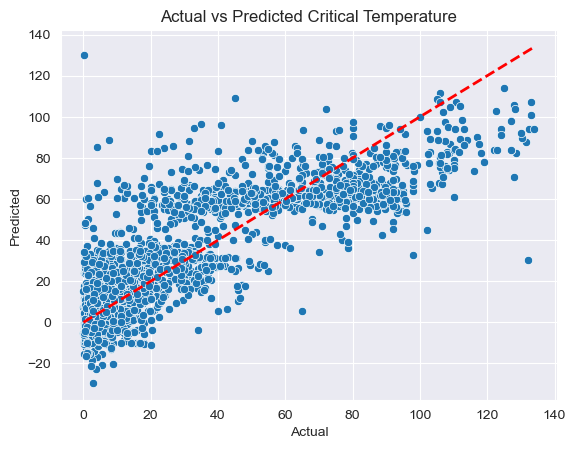

In [6]:
# Step 1: Initialize the linear regression model
simple_linear_regression = LinearRegression()

# Step 2: Fit the model on the scaled training data
simple_linear_regression.fit(scaled_X_train, new_train_y)

# Step 3: Predict on the training set
train_preds = simple_linear_regression.predict(scaled_X_train)

# Testing results
print('Linear Regression Results')
num_features = scaled_X_train.shape[1]
train_metrics = Evaluation_results(new_train_y, train_preds, objective = 'train', num_features  = num_features)
train_metrics

# # Testing Results
test_preds = simple_linear_regression.predict(scaled_X_test)
test_metrics = Evaluation_results(y_test, test_preds, objective = 'test', num_features  = num_features)
test_metrics


sns.scatterplot(x= y_test, y = test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()

### Random Forest

Random Forest Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 5.04996
Training MAE: 2.64721
Training R2 score: 0.97838
Training Adjusted R2 score: 0.97831
None
Random Forest Results on Test Set

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 10.23736
Testing MAE: 5.49195
Testing R2 score: 0.90775
Testing Adjusted R2 score: 0.90521
None


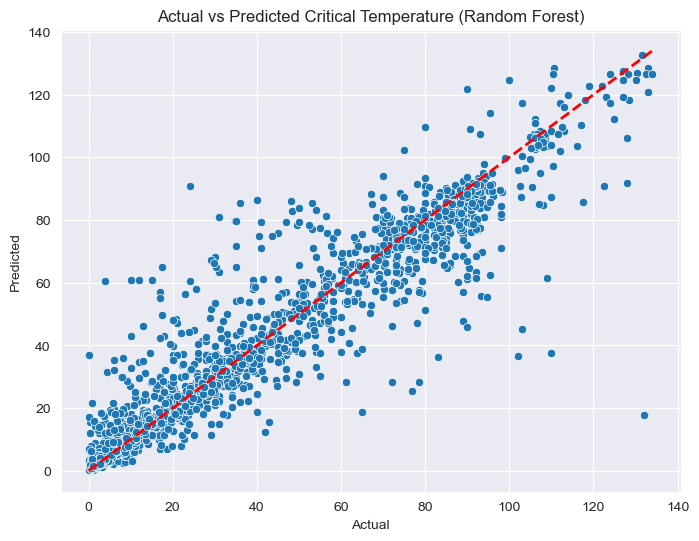

In [7]:
# Step 1: Define the Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, 
                                 max_depth=20,
                                 random_state=42)

# Step 2: Fit the model on the scaled training data
rf_model.fit(scaled_X_train, new_train_y)

# Step 3: Predict on the training set
rf_train_preds = rf_model.predict(scaled_X_train)

# Training results
print('Random Forest Results')
num_features = scaled_X_train.shape[1]
train_metrics = Evaluation_results(new_train_y, rf_train_preds, objective='train', num_features=num_features)
print(train_metrics)

# Step 4: Predict on the testing set
rf_test_preds = rf_model.predict(scaled_X_test)

# Testing results
print('Random Forest Results on Test Set')
num_features = scaled_X_train.shape[1]
test_metrics = Evaluation_results(y_test, rf_test_preds, objective='test', num_features=num_features)
print(test_metrics)

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature (Random Forest)')
plt.show()


### Gradient Boosting

Gradient Boosting Machine Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 4.17577
Training MAE: 1.36346
Training R2 score: 0.98522
Training Adjusted R2 score: 0.98517
None
Gradient Boosting Machine Results on Test Set

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 11.44935
Testing MAE: 6.06036
Testing R2 score: 0.88462
Testing Adjusted R2 score: 0.88144
None


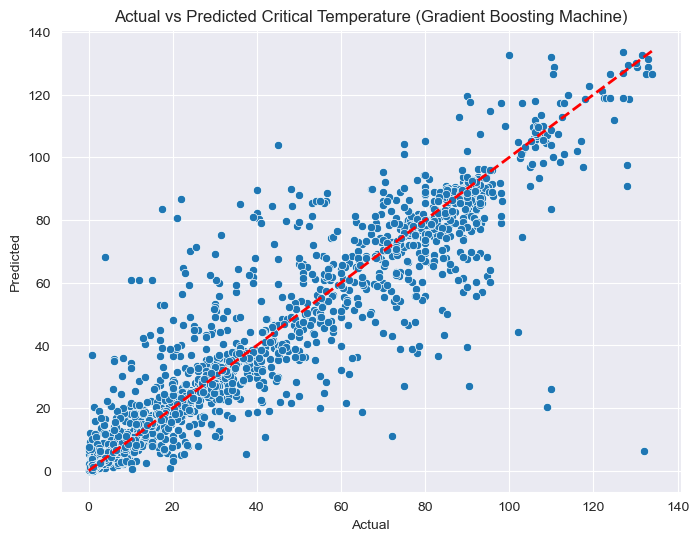

In [8]:
# Step 1: Initialize the GBM Regressor model
gbm_model = GradientBoostingRegressor(n_estimators=1000,
                                      learning_rate=0.01,
                                      max_depth=20,
                                      random_state=42)

# Step 2: Fit the model on the scaled training data
gbm_model.fit(scaled_X_train, new_train_y)

# Step 3: Predict on the training set
gbm_train_preds = gbm_model.predict(scaled_X_train)

# Training results
print('Gradient Boosting Machine Results')
num_features = scaled_X_train.shape[1]
train_metrics = Evaluation_results(new_train_y, gbm_train_preds, objective='train', num_features=num_features)
print(train_metrics)

# Step 4: Predict on the testing set
gbm_test_preds = gbm_model.predict(scaled_X_test)

# Testing results
print('Gradient Boosting Machine Results on Test Set')
num_features = scaled_X_train.shape[1]
test_metrics = Evaluation_results(y_test, gbm_test_preds, objective='test', num_features=num_features)
print(test_metrics)

# Plotting the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=gbm_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature (Gradient Boosting Machine)')
plt.show()


### XGBoost

XGBoost Results

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Training results:
Training RMSE: 4.18871
Training MAE: 1.46337
Training R2 score: 0.98513
Training Adjusted R2 score: 0.98508

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Testing results:
Testing RMSE: 10.83814
Testing MAE: 5.62038
Testing R2 score: 0.89661
Testing Adjusted R2 score: 0.89376


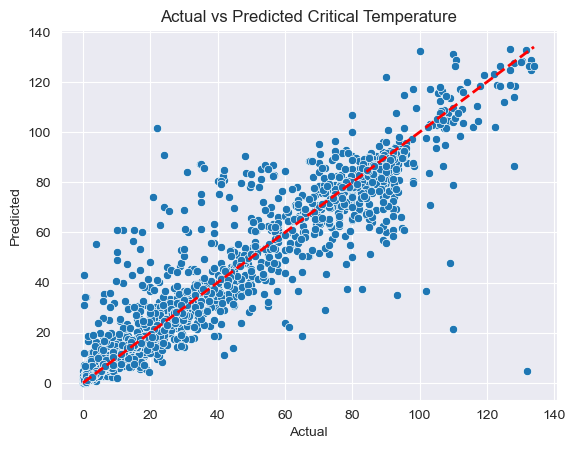

In [10]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=15,
                         
                             reg_lambda = 0.1,
                             random_state=42)

# Step 2: Fit the model on the scaled training data
xgb_model.fit(scaled_X_train, new_train_y)

# Step 3: Predict on the training set
xgb_train_preds = xgb_model.predict(scaled_X_train)

# Training results
print('XGBoost Results')
num_features = scaled_X_train.shape[1]
train_metrics = Evaluation_results(new_train_y, xgb_train_preds, objective = 'train', num_features  = num_features)
train_metrics

# Predict on the testing set
xgb_test_preds = xgb_model.predict(scaled_X_test)

# Testing results
num_features = scaled_X_train.shape[1]
test_metrics = Evaluation_results(y_test, xgb_test_preds, objective = 'test', num_features  = num_features)
test_metrics

# plotting the results
sns.scatterplot(x= y_test, y = xgb_test_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Critical Temperature')
plt.show()